# Real-Time Cat vs Dog Classifier

This notebook allows you to train and test a cat vs dog classifier using both uploaded images and real-time camera input.

**Sections:**
1. Import Required Libraries
2. Load and Preprocess Image from File
3. Capture and Preprocess Image from Camera
4. Load Pretrained Model
5. Train Model on Loaded Image
6. Test Model with Real-Time Camera Input
7. Display Model Predictions

In [1]:
# 1. Import Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import io
from IPython.display import display, clear_output
import ipywidgets as widgets
import os

2025-10-21 14:01:44.366287: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import preprocess_images from src/preprocess.py
import sys
sys.path.append('../src')
from preprocess import preprocess_images

# Helper to wrap single image for preprocess_images
import numpy as np
def preprocess_image(img, target_size=(150, 150)):
    arr = np.array(img)
    arr = arr[np.newaxis, ...]  # shape (1, h, w, c)
    processed = preprocess_images(arr, target_size=target_size, normalize=True)
    return processed

## 2. Load and Preprocess Image from File

Upload an image file, display it, and preprocess for model input.

In [3]:
# Widget to upload image
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

uploaded_image = None
preprocessed_uploaded = None

# Button to trigger processing after upload
process_button = widgets.Button(description='Process Uploaded Image')
output = widgets.Output()
display(process_button, output)

def on_process_clicked(b):
    global uploaded_image, preprocessed_uploaded
    output.clear_output()
    if uploader.value:
        # uploader.value is a tuple of dicts
        file_info = uploader.value[0]
        uploaded_image = Image.open(io.BytesIO(file_info['content'])).convert('RGB')
        with output:
            display(uploaded_image)
        preprocessed_uploaded = preprocess_image(uploaded_image)
        with output:
            print('Image preprocessed for model input:', preprocessed_uploaded.shape)
    else:
        with output:
            print('Please upload an image file first.')

process_button.on_click(on_process_clicked)

FileUpload(value=(), accept='image/*', description='Upload')

Button(description='Process Uploaded Image', style=ButtonStyle())

Output()

## 3. Capture and Preprocess Image from Camera

Capture an image using your webcam and preprocess it for model input.

Press SPACE to capture, ESC to exit
Image captured!
Image captured!


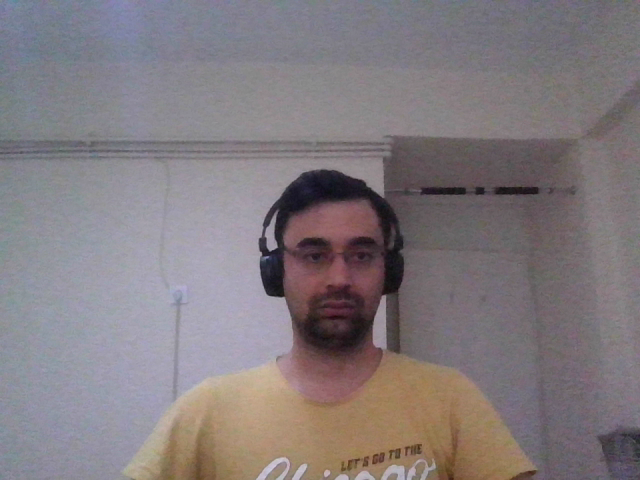

INFO:preprocess:Preprocessing 1 images
INFO:preprocess:Input shape: (1, 480, 640, 3)
INFO:preprocess:Target size: (150, 150)
INFO:preprocess:Output shape: (1, 150, 150, 3)
INFO:preprocess:Value range: [0.052, 0.832]
INFO:preprocess:Input shape: (1, 480, 640, 3)
INFO:preprocess:Target size: (150, 150)
INFO:preprocess:Output shape: (1, 150, 150, 3)
INFO:preprocess:Value range: [0.052, 0.832]


Camera image preprocessed: (1, 150, 150, 3)


In [4]:
# Capture image from webcam (OpenCV)
def capture_from_camera():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print('Cannot open camera')
        return None
    print('Press SPACE to capture, ESC to exit')
    img = None
    while True:
        ret, frame = cap.read()
        if not ret:
            print('Failed to grab frame')
            break
        cv2.imshow('Camera', frame)
        k = cv2.waitKey(1)
        if k%256 == 27:  # ESC pressed
            print('Escape hit, closing...')
            break
        elif k%256 == 32:  # SPACE pressed
            img = frame
            print('Image captured!')
            break
    cap.release()
    cv2.destroyAllWindows()
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img)
        display(img_pil)
        return img_pil
    return None

camera_image = capture_from_camera()
if camera_image:
    preprocessed_camera = preprocess_image(camera_image)
    print('Camera image preprocessed:', preprocessed_camera.shape)
else:
    preprocessed_camera = None

## 4. Load Pretrained Model

Load a pretrained or previously saved cat vs dog model.

In [5]:
# Load a pretrained model (update path as needed)
MODEL_PATH = '../models/cats_vs_dogs_model.keras'
if os.path.exists(MODEL_PATH):
    model = keras.models.load_model(MODEL_PATH)
    print('Loaded pretrained model from', MODEL_PATH)
else:
    print('Model file not found. Please train and save your model first.')
    model = None

Loaded pretrained model from ../models/cats_vs_dogs_model.keras


## 5. Train Model on Loaded Image

(Optional) Fine-tune or train the model using the uploaded image and its label.

In [8]:
# (Optional) Fine-tune model on uploaded image
# Provide label: 0 for Cat, 1 for Dog
uploaded_label = widgets.Dropdown(options=[('Cat', 0), ('Dog', 1)], description='Label:')
display(uploaded_label)

if model is not None and preprocessed_uploaded is not None:
    # Fine-tune for 1 epoch (demo)
    model.fit(preprocessed_uploaded, np.array([uploaded_label.value]), epochs=1)
    print('Model fine-tuned on uploaded image.')
else:
    print('Model or uploaded image not available.')

Dropdown(description='Label:', options=(('Cat', 0), ('Dog', 1)), value=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6577
Model fine-tuned on uploaded image.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6577
Model fine-tuned on uploaded image.


## 6. Test Model with Real-Time Camera Input

Use the camera-captured image to test the model and obtain predictions in real time.

In [6]:
# Predict on camera image
if model is not None and preprocessed_camera is not None:
    camera_pred = model.predict(preprocessed_camera)[0][0]
    print(f'Camera image prediction: {camera_pred:.2f}')
else:
    print('Model or camera image not available.')

2025-10-21 14:03:01.215146: I external/local_xla/xla/service/service.cc:163] XLA service 0x7dc6f0005ad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-21 14:03:01.215162: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-10-21 14:03:01.222393: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-21 14:03:01.260887: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
Camera image prediction: 0.51
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
Camera image prediction: 0.51


I0000 00:00:1761044581.776147   91391 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


## 7. Display Model Predictions

Display the prediction results for both the uploaded image and the camera input.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


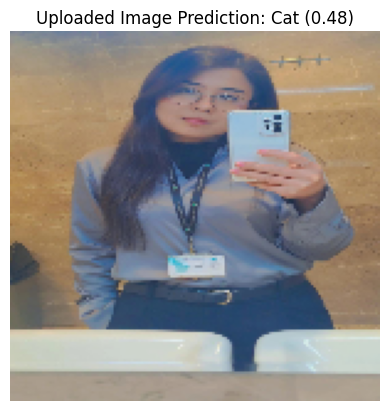

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


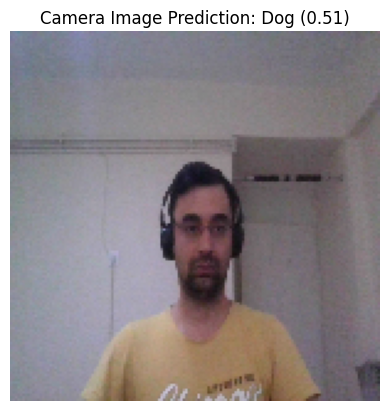

In [7]:
# Display predictions for both images
if model is not None:
    if preprocessed_uploaded is not None:
        uploaded_pred = model.predict(preprocessed_uploaded)[0][0]
        label = 'Dog' if uploaded_pred > 0.5 else 'Cat'
        plt.imshow(np.squeeze(preprocessed_uploaded))
        plt.title(f'Uploaded Image Prediction: {label} ({uploaded_pred:.2f})')
        plt.axis('off')
        plt.show()
    if preprocessed_camera is not None:
        camera_pred = model.predict(preprocessed_camera)[0][0]
        label = 'Dog' if camera_pred > 0.5 else 'Cat'
        plt.imshow(np.squeeze(preprocessed_camera))
        plt.title(f'Camera Image Prediction: {label} ({camera_pred:.2f})')
        plt.axis('off')
        plt.show()
else:
    print('Model not loaded.')